# A random assortment of statistics and probability examples
__1. Birthday paradox__
<br>__2. Coupon collector's problem__
<br>__3. Poisson and exponential events probabilities__
<br>__4. Goodness of fit: chi-squared and k-s tests__
<br>__5. Jeep problem__
<br>__6. Streaks__
<br>__7. Imperfect Streaks__
<br>__8. Simulated Chinese Restaurant Process__
<br>__9. Simulated Dirichlet Process__

In [67]:
import numpy as np
import scipy.stats
import scipy.optimize
import sys
import matplotlib.pyplot as plt
import pandas as pd
import random

### 1. Birthday paradox
Probability of having the same birthday.
<br>Some cool algebra tricks wth help of Taylor expansion of exp(x)
<br>https://betterexplained.com/articles/understanding-the-birthday-paradox/

In [2]:
### Probability given number people in room
days_in_year: int = 365
people_in_room: int = 6

prob_different = np.exp(-1*(people_in_room ** 2 / (2 * days_in_year)))
prob_same = 1 - prob_different
prob_same

0.04811882531956668

In [3]:
### How many people to get certain probability
desired_prob_same = 0.9

prob_different = 1 - desired_prob_same
# 0 = people_in_room^2 - people_in_room + 2 * days_in_year * np.ln(prob_different)
people_in_room = 1 + np.sqrt(1**2 - 4 * 1 * 2 * days_in_year * np.log(prob_different)) / (2 * 1)
people_in_room

42.00167213523923

### 2. Coupon collector's problem
Approach: work back from probabilities of getting the next unpossessed coupon.
<br>(Number of coupons required is reciprocal to probability of getting needed coupons.)
<br>Thanks to algebra, the summation simplifies to a quantity including the harmonic number of coupons.
<br>https://brilliant.org/wiki/coupon-collector-problem/

In [4]:
number_coupons: int = 10

def harmonic_num(x: int):
    harmonic_number: float = 0.0
    for i in range(x):
        harmonic_number += 1/(i + 1)
    return harmonic_number
number_times: float = number_coupons * harmonic_num(number_coupons)
np.round(number_times, 3)

29.29

### 3. Poisson events and exponential time between events
<br>References: Wiki articles for poisson and exponential distributions
<br>https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution

__Baseball no-hitters events__
<br>[sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf](sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf)
<br>49 no-hitters in 40 years 1920-1959; over 280 months of baseball season
<br>lambda = 1.225 no-hitters per year
<br>lambda = 0.175 no-hitters per month

In [5]:
avg_event_rate = 49/280 # lambda: the number occurences per time period

### Poisson: probability of a given number of events occuring
number_events_per_time_interval_to_investigate: int = 0
    
def poisson_pdf(rate, number_events_to_check):
    return (rate ** number_events_to_check * 
            np.exp(-1 * rate) /
            np.math.factorial(number_events_to_check))
    
prob_of_that_number_of_events = poisson_pdf(rate = avg_event_rate, 
                                            number_events_to_check = number_events_per_time_interval_to_investigate)

prob_of_that_number_or_fewer_events = 0
for i in range(number_events_per_time_interval_to_investigate + 1):
    prob_of_that_number_or_fewer_events += \
    poisson_pdf(rate = avg_event_rate, 
                number_events_to_check = i)

print("Avg number events per time period:", 
      np.round(avg_event_rate, 3))
print("Number of events in that time period to investigate:", number_events_per_time_interval_to_investigate)
print("Prob_of_that_number_of_events:", 
      np.round(prob_of_that_number_of_events, 3))
print("Prob_of_that_number_or_fewer_events (including 0):", 
      np.round(prob_of_that_number_or_fewer_events, 3))

Avg number events per time period: 0.175
Number of events in that time period to investigate: 0
Prob_of_that_number_of_events: 0.839
Prob_of_that_number_or_fewer_events (including 0): 0.839


In [6]:
avg_event_rate = 49/280 # lambda: the number occurences per time period

### Exponential: time between events
time_to_investigate = 1/7 # 7 months in mlb season

prob_of_that_exact_time_between_occurences = avg_event_rate * np.exp(-1 * avg_event_rate * time_to_investigate)
prob_of_time_between_occurences = 1 - np.exp(-1 * avg_event_rate * time_to_investigate) # this amount of time or less

avg_time_between_events = 1 / avg_event_rate
median_time_between_events = np.log(2) / avg_event_rate
median_time_between_events

print("Avg number events per time period:", 
      np.round(avg_event_rate, 3))
print("Time between events to investigate:", 
      np.round(time_to_investigate, 3))
# print("Prob_density_at_that_exact_time_between_occurences:", 
#       np.round(prob_of_that_exact_time_between_occurences, 3))
print("Prob_of_that_time_or_less_between_events (including 0):", 
      np.round(prob_of_time_between_occurences, 3))
print("Avg_time_between_events:", 
      np.round(avg_time_between_events, 3))
print("Probability of avg time or less between events:", 
      np.round(1 - np.exp(-1 * avg_event_rate * avg_time_between_events), 3))
print("Median_time_between_events", 
      np.round(median_time_between_events, 3))

Avg number events per time period: 0.175
Time between events to investigate: 0.143
Prob_of_that_time_or_less_between_events (including 0): 0.025
Avg_time_between_events: 5.714
Probability of avg time or less between events: 0.632
Median_time_between_events 3.961


### 4. Goodness of fit
Chi-squared test for deviation from expected distribution
<br>Only for binned/categorical data
<br>[sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf](sandcat.middlebury.edu/econ/repec/mdl/ancoec/0717.pdf)
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [7]:
observed_array = [11, 15, 9, 4, 1]
expected_array = [11.75, 14.39, 8.8164, 3.6, 1.1025]
dof_adjustment = 1 # +1 if also estimating mean for poisson from sample data

print("If pvalue below 0.05, observations do not belong to expected distribution.")
print("P-value =",
      scipy.stats.chisquare(f_obs = observed_array,
                            f_exp = expected_array,
                            ddof = dof_adjustment)[1])

If pvalue below 0.05, observations do not belong to expected distribution.
P-value = 0.9878024170265235


Goodness of fit for continuous variables
<br>https://stats.stackexchange.com/questions/76350/goodness-of-fit-for-continuous-variables

Scipy kstest
<br>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

List of continuous distributions in scipy
<br>https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

In [8]:
scipy.stats.kstest(rvs = scipy.stats.uniform.rvs(size=1000, random_state = 12345),
                  cdf = "norm",
                  #args = (1, 1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.5000427891604897, pvalue=9.655302994802462e-232)

Named tuple
<br>https://docs.python.org/2/library/collections.html

In [9]:
import collections
norm_args = collections.namedtuple('norm_args', ['loc', 'scale'])

In [10]:
scipy.stats.kstest(rvs = scipy.stats.norm.rvs(loc = 1,
                                              scale = 1,
                                              size = 1000, 
                                              random_state = 12345),
                  cdf = "norm",
                  args = norm_args(loc=1, scale=1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.02526609656624318, pvalue=0.5457961444206735)

In [11]:
uniform_args = collections.namedtuple('uniform_args', ['loc', 'scale'])

In [12]:
scipy.stats.kstest(rvs = scipy.stats.uniform.rvs(loc = 1,
                                                 scale = 1,
                                                 size=1000, 
                                                 random_state = 12345),
                  cdf = "uniform",
                  args = uniform_args(loc=1, scale=1),
                   # N = 20,
                  alternative = 'two-sided',
                  mode = 'approx')

KstestResult(statistic=0.014856419814211264, pvalue=0.9800639362901664)

### 5. Jeep problem
<br>https://en.wikipedia.org/wiki/Jeep_problem

In [13]:
desert_width = 5

def dist_explore(num_trips):
    return harmonic_num(x = num_trips) / 2

def dist_cross(num_trips):
    final_trip_distance = 0.0
    for i in range(num_trips):
        final_trip_distance += 1 / (2 * (i + 1) - 1)
    return final_trip_distance

resultant_distance = 0.0
n_trips_to_explore = 0
while resultant_distance < desert_width:
    n_trips_to_explore += 1
    resultant_distance = dist_explore(num_trips = n_trips_to_explore)

resultant_distance = 0.0
n_trips_to_cross = 0
while resultant_distance < desert_width:
    n_trips_to_cross += 1
    resultant_distance = dist_cross(num_trips = n_trips_to_cross)

print(n_trips_to_explore, "trips needed to explore")
print(n_trips_to_cross, "trips needed to cross")

12367 trips needed to explore
3092 trips needed to cross


### 6. Streaks
What's the probability of a given success or fail streak?
<br>(This is a nice problem to introduce Markov Chains, but the chain is slower to compute.)
<br>https://www.askamathematician.com/2010/07/q-whats-the-chance-of-getting-a-run-of-k-successes-in-n-bernoulli-trials-why-use-approximations-when-the-exact-answer-is-known/

In [14]:
sys.setrecursionlimit(20000)

def prob_of_streak(num_trials, streak_length, prob_success, saved = None):
    if saved == None: saved = {}
    
    ID = (num_trials, streak_length, prob_success)
    
    if ID in saved: return saved[ID]
    else:
        if streak_length > num_trials or num_trials <= 0:
            result = 0
        else:
            result = prob_success ** streak_length
            for first_fail in range(1, streak_length + 1):
                pr = prob_of_streak(num_trials = num_trials - first_fail,
                                   streak_length = streak_length,
                                   prob_success = prob_success,
                                   saved = saved)
                result += (prob_success ** (first_fail - 1)) * (1 - prob_success) * pr
        saved[ID] = result
        
        return result    

Test function with single iteration

In [15]:
p_success = 0.350 # -.350 on base %
n_trials = 650    # plate appearances per year

prob_of_streak(num_trials = n_trials, 
               streak_length = 650, 
               prob_success = p_success)

4.407870509145775e-297

In [16]:
def prob_streak_list(prob_success, n_trials):
    probs_success_streak = [prob_of_streak(num_trials = n_trials, 
                                       streak_length = 1,
                                       prob_success = prob_success)]

    i = 2
    while i <= n_trials:
        if probs_success_streak[i - 2] <= 0.0001:
            probs_success_streak.append(0.0)
            i += 1
        elif probs_success_streak[i - 2] >= 0.999:
            tmp = prob_of_streak(num_trials = n_trials, 
                                 streak_length = i + 1,
                                 prob_success = prob_success)
            if tmp >= 0.999:
                probs_success_streak.append((probs_success_streak[i - 2] + tmp) /2)
                probs_success_streak.append(tmp)
                i += 2
            else:
                probs_success_streak.append(prob_of_streak(num_trials = n_trials, 
                                                       streak_length = i,
                                                       prob_success = prob_success))
                probs_success_streak.append(tmp)
                i += 2
        else:
            probs_success_streak.append(prob_of_streak(num_trials = n_trials, 
                                                   streak_length = i,
                                                   prob_success = prob_success))
            i += 1
    return [x for x in probs_success_streak if x > 0]

def prob_streak_lists(prob_success, n_trials):
    return [prob_streak_list(prob_success_i, n_trials) for prob_success_i in [prob_success, 1 - prob_success]]

__Baseball hits example__

In [17]:
p_success = 0.350 # 0.350 on base %
num_trials =  650    # plate appearances per year
streak_list_results = prob_streak_lists(prob_success =  p_success,
                                        n_trials = num_trials)

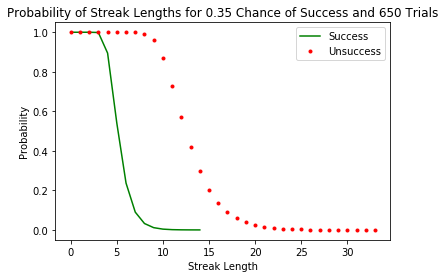

In [18]:
plt.plot([i for i in range(len(streak_list_results[0]))], streak_list_results[0],
               label = 'Success',
               linestyle = '-', color = 'green')
plt.plot([i for i in range(len(streak_list_results[1]))], streak_list_results[1],
               label = 'Unsuccess',
               linestyle = '', marker = '.', color = 'red')
plt.xlabel('Streak Length')
plt.ylabel('Probability')
plt.title('Probability of Streak Lengths for ' + str(p_success) + " Chance of Success and " +
         str(num_trials) + " Trials")
plt.legend()
plt.show()

Check slump results

In [19]:
streak_list_results[1][0:14]

[1.0,
 0.9999999999999998,
 0.9999999999999996,
 0.999999999999999,
 0.9999999999999984,
 0.9999986946518137,
 0.9999973893036289,
 0.9996594807180735,
 0.9934220579691067,
 0.9588218921219284,
 0.8697568870122705,
 0.7297720428653122,
 0.569449053814327,
 0.4195509348521937]

Even an exceptional hitter should expect 8-9 in-a-row slump during the season.

But if a batter is in a 14-straight slump with a season average of 0.350, they probably are actually in a slump.

__Basketball shots example__

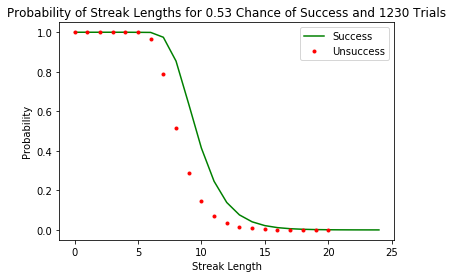

In [20]:
p_success = 0.53 # 53% field goal percentage
num_trials =  15 * 82 # 15 field goals attempted per game, 82 games per season 
streak_list_results = prob_streak_lists(prob_success =  p_success,
                                        n_trials = num_trials)

plt.plot([i for i in range(len(streak_list_results[0]))], streak_list_results[0],
               label = 'Success',
               linestyle = '-', color = 'green')
plt.plot([i for i in range(len(streak_list_results[1]))], streak_list_results[1],
               label = 'Unsuccess',
               linestyle = '', marker = '.', color = 'red')
plt.xlabel('Streak Length')
plt.ylabel('Probability')
plt.title('Probability of Streak Lengths for ' + str(p_success) + " Chance of Success and " +
         str(num_trials) + " Trials")
plt.legend()
plt.show()

In [21]:
streak_list_results[0][0:15]

[1.0,
 0.9999999999999996,
 0.9999999999999992,
 0.9999999999992637,
 0.9999999999985283,
 0.9995714941544882,
 0.999142988310448,
 0.9746329050304372,
 0.8541837388875277,
 0.6369811014505753,
 0.41412608868743445,
 0.24612583888598696,
 0.13880432660110342,
 0.07603274776428774,
 0.04099623343587418]

So, a player who shoots 53% from the field career, should have a 10 shot streak in 64% of seasons.
<br>If they don't, then their accuracy was changing season to season.

Another way, if they shot 53% for the season but had a 15 shot streak, their accuracy inconsistent through the season.

__Steph curry's 100 4th quarter free throws in a row__

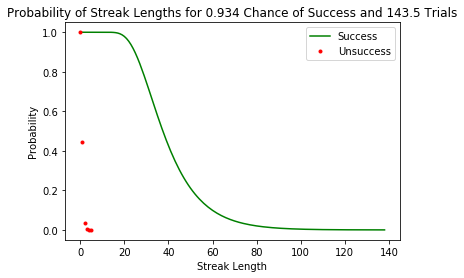

In [42]:
p_success = 0.934 # 0.906 career, 0.934 season best
num_trials = 7 * 82 / 4 # free throw attempts per game, games per season, 1/4 for 4th quarter only
streak_list_results = prob_streak_lists(prob_success =  p_success,
                                        n_trials = num_trials)
plt.plot([i for i in range(len(streak_list_results[0]))], streak_list_results[0],
               label = 'Success',
               linestyle = '-', color = 'green')
plt.plot([i for i in range(len(streak_list_results[1]))], streak_list_results[1],
               label = 'Unsuccess',
               linestyle = '', marker = '.', color = 'red')
plt.xlabel('Streak Length')
plt.ylabel('Probability')
plt.title('Probability of Streak Lengths for ' + str(p_success) + " Chance of Success and " +
         str(num_trials) + " Trials")
plt.legend()
plt.show()

In [106]:
p_success = 0.934 # 0.906 career, 0.934 season best
num_trials = 7 * 82 / 4 # free throw attempts per game, games per season, 1/4 for 4th quarter only

def optim_100_shots(p_success, num_trials, streak_length, target_prob):
    return (prob_of_streak(num_trials, streak_length, prob_success = p_success, saved = None) -
           target_prob) ** 2 
    
#scipy.optimize.minimize_scalar(optim_100_shots, bounds = (0.001, 0.999), method='bounded', 
#                               args = (num_trials, 100, 0.1), options={'xatol': 1e-05, 'maxiter': 500, 'disp': 1})

target_probs = np.arange(0.1, 1.0, 0.1)
pd.DataFrame({"Overall Freethrow Accuracy" : [str(np.round(target_prob * 100)) for target_prob in target_probs],
            "Probability of seeing 100-streak 4th Quarter in a season" : 
              [scipy.optimize.minimize_scalar(optim_100_shots, bounds = (0.001, 0.999), method='bounded', 
                                args = (num_trials, 100, target_prob))['x'] 
             for target_prob in target_probs]})



,Overall Freethrow Accuracy,Probability of seeing 100-streak 4th Quarter in a season
0,10.0,0.968993
1,20.0,0.977370
2,30.0,0.982507
3,40.0,0.986299
4,50.0,0.989357
5,60.0,0.991953
6,70.0,0.994236
7,80.0,0.996299
8,90.0,0.998204


Aside from cherry-picking the 4th quarter stats, Steph was legitimately playing better than his own high free throw % average during the 4th quarter of games during his streak.

__What about karl malone's 18 straight free-throws in a finals game?__

In [116]:
p_success = 0.934 # 0.906 career, 0.934 season best
num_trials = 7 * 17 # free throw attempts per game, 17 finals games per karl's career

def optim_100_shots(p_success, num_trials, streak_length, target_prob):
    return (prob_of_streak(num_trials, streak_length, prob_success = p_success, saved = None) -
           target_prob) ** 2 
    
#scipy.optimize.minimize_scalar(optim_100_shots, bounds = (0.001, 0.999), method='bounded', 
#                               args = (num_trials, 100, 0.1), options={'xatol': 1e-05, 'maxiter': 500, 'disp': 1})

target_probs = np.arange(0.1, 1.0, 0.1)
pd.DataFrame({"Overall Freethrow Accuracy" : [str(np.round(target_prob * 100)) for target_prob in target_probs],
            "Probability of seeing 100-streak 4th Quarter in a season" : 
              [scipy.optimize.minimize_scalar(optim_100_shots, bounds = (0.001, 0.999), method='bounded', 
                                args = (num_trials, 18, target_prob))['x'] 
             for target_prob in target_probs]})



,Overall Freethrow Accuracy,Probability of seeing 100-streak 4th Quarter in a season
0,10.0,0.732645
1,20.0,0.769017
2,30.0,0.792988
3,40.0,0.811997
4,50.0,0.828573
5,60.0,0.844046
6,70.0,0.859433
7,80.0,0.875987
8,90.0,0.896521


Assuming a 75% career free-throw avg, Karl played better than his career average during the finals.

### 7. Simulated Streaks with Impurity
What about streaks other than 100% pure success (or failure)?
<br>Let's simulate:

In [22]:
def sim_streak_prob(p_success: float,
                    k_successes: int,
                    out_of_m_tries: int,
                    num_trials: int):
    
    num_iters = 50000
    prev = 1.0
    current = 0.0    
    iteration = 0
    
    while current != prev and iteration < 20:
        iteration += 1
        
        prev = current
    
        run_matrix = ((np.random.uniform(size = (num_iters, num_trials)) # run matrix of random numbers
                       < p_success).astype(int). # was trial successful?
                      cumsum(axis = 1))          # cumsums of success
        run_matrix[:, out_of_m_tries:] = run_matrix[:, out_of_m_tries:] - run_matrix[:, :-out_of_m_tries] # cumsum to rolling sum
        run_matrix = (run_matrix >= k_successes).astype(int) # detect streaks during n events
        run_matrix = (run_matrix.sum(axis = 1) >= 1).astype(int).mean() # average streaks over iters
        current = prev * (iteration - 1) / iteration + run_matrix * 1 / iteration
        current = np.round(current, 4)
        
    return current, iteration

# probability of hitting 4-for-5
sim_streak_prob(p_success = 0.35,
                k_successes = 4,
                out_of_m_tries = 5,
                num_trials = 650)

(1.0, 2)

__Test on basketball__
Compare to 9 out of 9 results from before

In [28]:
sim_streak_prob(p_success = 0., # field goal %
                   k_successes = 100,
                   out_of_m_tries = 100,
                   num_trials = 7 * 82) # free throw attempts per game, games per season

(0.0, 1)

Find most number of plate appearances where batter will only miss 1 

In [24]:
plate_appears = 3
minus_1_result = 1.0

while minus_1_result > 0.99:
    plate_appears += 1
    minus_1_result, _ = sim_streak_prob(p_success = 0.350, # field goal %
                                        k_successes = plate_appears - 1,
                                        out_of_m_tries = plate_appears,
                                        num_trials = 650) # games per season
plate_appears

7

Wow- a .350 hitter should go 6-for-7 at least once in the season

In [25]:
plate_appears = 3
minus_1_result = 1.0

while minus_1_result > 0.80:
    plate_appears += 1
    minus_1_result, _ = sim_streak_prob(p_success = 0.350, # field goal %
                                        k_successes = plate_appears - 1,
                                        out_of_m_tries = plate_appears,
                                        num_trials = 650) # games per season
plate_appears

8

And that same .350 hitter should only go 7-for-8 in 80% of seasons.

In [ ]:
sim_streak_prob(p_success = 0.53, # field goal %
                   k_successes = 100,
                   out_of_m_tries = 100,
                   num_trials = 15 * 82) # games per season

### 8. Chinese Restaurant
https://en.wikipedia.org/wiki/Chinese_restaurant_process
<br>discount, α, and strength, θ, defined for 0 ≤ α < 1 and θ > −α

__Base Solution__

In [206]:
init_seating = [1]
number_patrons = 100

np.random.seed(1)
seating = init_seating.copy()
for i in range(number_patrons - 1):
    seating += [1]
    patrons_sat_sum = sum(seating)
    patrons_sat_cumsum = np.cumsum(seating)
    tmp = np.random.uniform()
    seating[sum(patrons_sat_cumsum / patrons_sat_sum <= tmp)] = \
    seating[sum(patrons_sat_cumsum /patrons_sat_sum <= tmp)] + 1
    if seating[-1] == 2:
        seating[-1] = 1
    else:
        seating = seating[0:-1]
            
seating

[81, 13, 5, 1]

__General Solution__

In [205]:
discount = 0 ## 0 by default
strength = 1 ## 1 by default
init_seating = [1]
number_patrons = 100

np.random.seed(1)
seating = init_seating.copy()
for i in range(number_patrons - 1):
    patrons_sat_sum = sum(seating)
    seating_probs = [(a - discount) / (patrons_sat_sum + strength) for a in seating] + \
    [(strength + len(seating) * discount) / (patrons_sat_sum + strength)]
    seating_probs = np.cumsum(seating_probs)
    tmp = np.random.uniform()
    index_to_seat_at = sum(seating_probs <= tmp)
    if index_to_seat_at == len(seating):
        seating.append(1)
    else:
        seating[index_to_seat_at] = seating[index_to_seat_at] + 1
    
seating

[81, 13, 5, 1]

In [208]:
def general_chinese_prior_iter(number_patrons, discount = 0, strength = 1, func_seed = 1):
    init_seating = [1]
    np.random.seed(func_seed)
    
    seating = init_seating.copy()
    for i in range(number_patrons - 1):
        patrons_sat_sum = sum(seating)
        seating_probs = [(a - discount) / (patrons_sat_sum + strength) for a in seating] + \
        [(strength + len(seating) * discount) / (patrons_sat_sum + strength)]
        seating_probs = np.cumsum(seating_probs)
        tmp = np.random.uniform()
        index_to_seat_at = sum(seating_probs <= tmp)
        if index_to_seat_at == len(seating):
            seating.append(1)
        else:
            seating[index_to_seat_at] = seating[index_to_seat_at] + 1
    
    return seating

In [215]:
for i in range(10):
    print(general_chinese_prior_iter(number_patrons = 20, func_seed = i))

[2, 3, 9, 4, 2]
[18, 2]
[20]
[4, 13, 1, 1, 1]
[4, 8, 5, 2, 1]
[12, 5, 3]
[7, 10, 2, 1]
[8, 9, 3]
[2, 12, 4, 1, 1]
[18, 2]


### 9. Dirichlet Process
https://en.wikipedia.org/wiki/Dirichlet_process
<br>base distributions in scipy
<br>https://docs.scipy.org/doc/scipy/reference/stats.html

In [589]:
dirichlet_obs = None

def dirichlet_iter(base_dist = scipy.stats.norm.rvs, obs = None, scale = 1):
    if obs is None:
        obs = pd.DataFrame({"value": [base_dist()],
                            "count": [1],
                            "pdf": [1],             
                            "cdf": [1]})
    else:
        tmp = np.random.uniform()
        obs.loc[:, 'pdf'] = obs.loc[:,'count'] / (scale + sum(obs.loc[:,'count']) - 1 + 1)
        obs.loc[:, 'cdf'] = np.cumsum(obs.loc[:, 'pdf'])
        if tmp > max(obs.loc[:, 'cdf']):
            value = base_dist()
            if sum(obs.loc[:, 'value'] == value) == 0:
                obs = pd.concat([obs,
                                 pd.DataFrame({"value": [value],
                                               "count": [1],
                                               "pdf": [1],
                                               "cdf": [1]})])
                obs = obs.sort_values('value')
            else:
                obs.loc[obs['value'] == value, 'count'] = obs.loc[obs['value'] == value, 'count'] + 1
        else:
            ind_to_incr = sum(obs.loc[:, 'cdf'] <= tmp)
            obs.iloc[ind_to_incr, obs.columns.get_loc('count')] = obs.loc[:, 'count'].iloc[ind_to_incr] + 1        
        
    return obs

In [599]:
num_samples = 1000
scale = 30
dirich_df = dirichlet_iter(scale = scale)
for i in range(num_samples - 1):
    dirich_df = dirichlet_iter(obs = dirich_df, scale = scale)
dirich.head()

,value,count,pdf,cdf
0,-1.011184,1,0.01,0.01
0,-0.813780,2,0.02,0.03
0,-0.191391,47,0.47,0.50
0,0.094072,1,0.01,0.51
0,0.164440,30,0.29,0.80


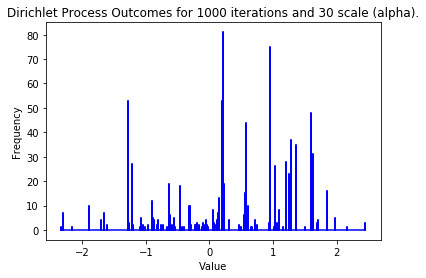

In [600]:
dirichlet_values_list = []
for i in list(dirich_df['value']):
    dirichlet_values_list += [i, i, i]

dirichlet_counts_list = []
for i in list(dirich_df['count']):
    dirichlet_counts_list += [0, i, 0]

plt.plot(dirichlet_values_list, 
         dirichlet_counts_list,
         #label = 'Dirichlet results',
         linestyle = '-', #marker = '.', 
         color = 'blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Dirichlet Process Outcomes for ' + str(num_samples) + " iterations and " +
         str(scale) + " scale (alpha).")
#plt.legend()
plt.show()